In [1]:
#import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#import DNN libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

In [13]:
#read data
data= pd.read_csv('HousingData.csv')

In [14]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
#Preprocesing

In [16]:
data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [17]:
data=data.dropna()

In [18]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [19]:
x=data.drop('MEDV',axis=1) #features
y=data['MEDV']


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
scaler=StandardScaler()

In [23]:
x_train_scale= scaler.fit_transform(x_train)
x_test_scale= scaler.transform(x_test)

In [24]:
#Model Build

In [26]:
model = Sequential([Input(shape=(x_test_scale.shape[1],)),
                    Dense(64,activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(1)])

In [27]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(x_train_scale,y_train,epochs=20,batch_size=32,validation_data=[x_test_scale,y_test])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 559.3252 - mae: 21.8380 - val_loss: 635.8698 - val_mae: 23.4885
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 524.1374 - mae: 21.0851 - val_loss: 606.7277 - val_mae: 22.8607
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 508.7920 - mae: 20.6109 - val_loss: 566.7562 - val_mae: 21.9715
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 446.7083 - mae: 19.0496 - val_loss: 506.2729 - val_mae: 20.6223
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 423.0268 - mae: 18.0340 - val_loss: 418.6151 - val_mae: 18.5426
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 310.7698 - mae: 15.4607 - val_loss: 304.5560 - val_mae: 15.4025
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 237.9951 - mae: 13.0209 - val_loss: 183.4072 - val_mae: 11.0936
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 130.5866 - mae: 9.2482 - val_loss: 102.5676 - val_mae: 7.7001
Epoch 9/20
10/10 ━

In [30]:
y_pred= model.predict(x_test_scale)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


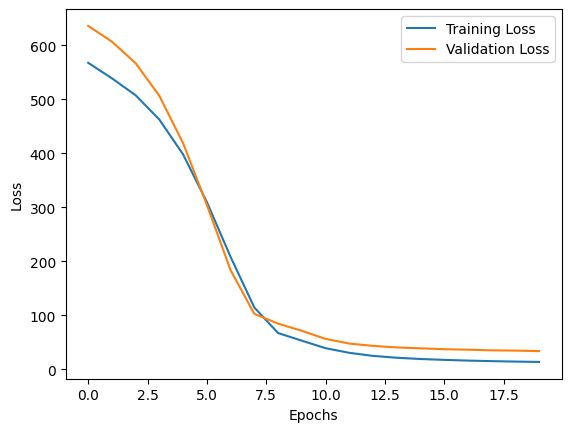

In [31]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
#model evaluate
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
mse=mean_squared_error(y_test,y_pred)

In [34]:
rmse=np.sqrt(mse)

In [35]:
r2=r2_score(y_test,y_pred)

In [36]:
mse

33.61493618535479

In [37]:
rmse

np.float64(5.79783892371587)

In [38]:
r2

0.601465787260345